<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK12_2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **군집화**

# 1. K-평균 알고리즘 이해

- K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘
- K-평균은 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행
- 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법

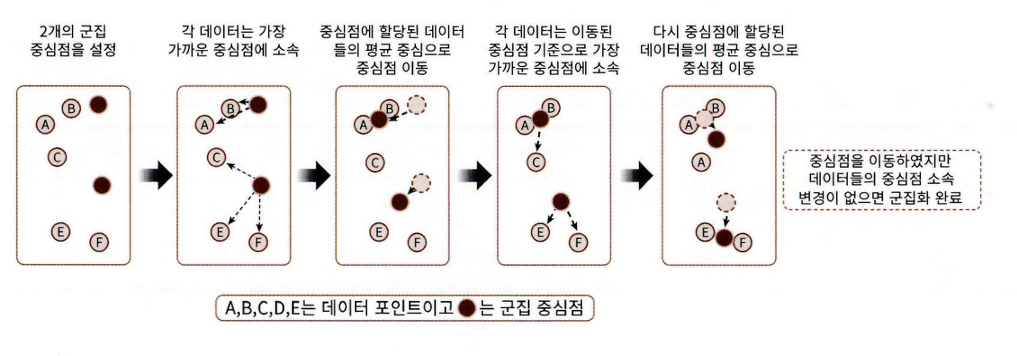

< 방법 >

1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됨
> 위 그림에서는 A, B 데이터가 같은 중심점에 소속되며, C, E, F 데이터가 같은 중심점에 소속됨
3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동
> 위 그림에서는 A, B 데이터 포인트의 평균 위치로 중심점이 이동했고, 다른 중심점 역시 C, E, F 데이터 포인트의 평균 위치로 이동함
4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속 변경
> 위 그림에서는 C 데이터가 기존의 중심점보다 더 가까운 중심점으로 변경됨
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동
> 위 그림에서는 데이터 C가 중심 소속이 변경되면서 두 개의 중심이 모두 이동
6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료, 그렇지 않다면 다시 4번 과정을
거쳐서 소속을 변경하고 이 과정을 반복

< 장점 >
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결

< 단점 >
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
> 이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어려움

## 사이킷런 KMeans 클래스 소개

In [15]:
# class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=O.0001,
#                             precompute_distances='auto', verbose=0, random_state=None,
#                             copy_x=True, n_Jobs=1, algorithm='auto')

- 가장 중요한 파라미터 = n_clusters : 군집화 개수, 즉 군집 중심점의 개수 의미
- init : 초기 군집 중심점 좌표 설정 방식
> 일반적으로 k-means++ 방식으로 최초 설정
- max_iter : 최대 반복 횟수
> 이 횟수 이전 모든 데이터의 중심점 이동이 없으면 종료

- KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit 또는 fit_transform 메서드를 이용해 수행
- 이렇게 수행된 KMeans 객체는 군집화 수행이 완료되어 군집화와 관련된 주요 속성 파악 가능
    - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
    - cluster_centers_ : 각 군집 중심점 좌표(shape는 [군집 개수, 피처 개수])
    > 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 가능

## K-평균을 이용한 붓꽃 데이터 세트 군집화

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length' ,'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- labels_의 값이 0, 1, 2로 돼 있으며, 이는 각 레코드가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함을 의미

In [5]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 2차원 평면상에서 개별 데이터의 군집화를 시각화
- 붓꽃 데이터 세트의 속성이 4개이기에 2차원 평면에 적합하지 않아 PCA를 이용해 4개의 속성을 2개로 축소해 X, Y 좌표로 개별 데이터 표현

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


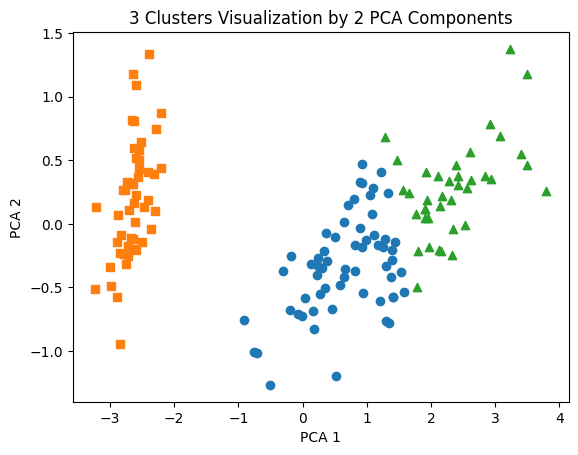

In [7]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster' ]==0].index
marker1_ind = irisDF[irisDF['cluster' ]==1].index
marker2_ind = irisDF[irisDF['cluster' ]==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pea_y 값 추출
# o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 군집화 알고리즘 테스트를 위한 데이터 생성

< 대표적인 군집화용 데이터 생성기 >
- make_blobs( ) & make classification( ) API
- 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성 가능
- 둘 중에 어떤 것을 사용하든 큰 차이는 없음
    - **make_blobs( )** = 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있음
    - **make_classifcation( )** = 노이즈를 포함한 데이터를 만드는 데 유용하게 사용 가능
    > 둘 다 분류 용도로도 테스트 데이터 생성 가능
- 이 외에 make_circle( ), make_moon( ) API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용됨
- make_blobs( )를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환됨

**make_blobs()의 호출 파라미터**

- n_samples
    - 생성할 총 데이터의 개수
    - 디폴트는 100개
- n_features
    - 데이터의 피처 개수
    - 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현
- centers
    - int 값
    > 예를 들어 3으로 설정하면 군집의 개수를 나타냄, 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미
- cluster_std
    - 생성될 군집 데이터의 표준 편차를 의미
    - 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐
    > [0.8, 1, 2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8. 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듦
    - 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X 반환
# 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환됨
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
# np.unique(y) : y 안에 있는 중복을 제거한 고유 값들을 오름차순으로 정렬해서 반환
# return_counts=True 옵션 : 각 고유 값이 몇 번 등장했는지 횟수도 같이 반환
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [10]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


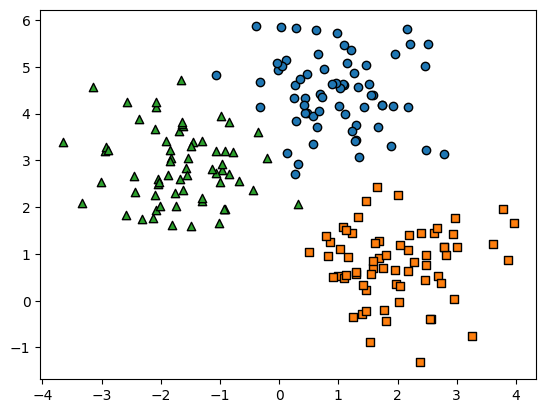

In [16]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값
markers = ['o', 's','^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target=0, target=1, target=2 로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

/tmp/ipython-input-319111435.py:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',


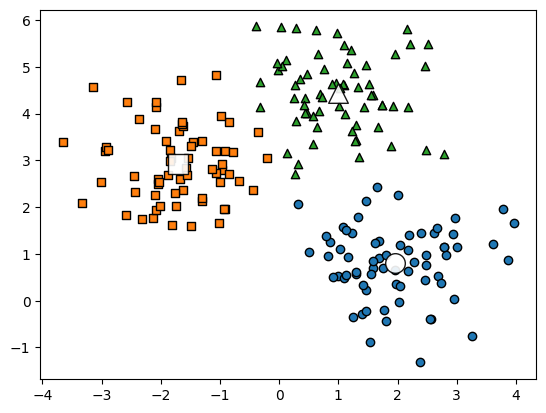

In [13]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers [label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolor='k', marker='' % label)
plt.show()

In [14]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


# 2. 군집 평가 (Cluster Evaluation)

- 군집화는 데이터 내에 숨어있는 별도의 그룹을 찾아 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값 데이터도 더 넓은 군집화 레벨화 등의 영역을 지님
- 비지도 학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하는 것은 어렵지만, 군집화 성능 평가의 대표적 방법으로 "실루엣 분석"을 이용

## 실루엣 분석의 개요

- 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 나타냄
- 효율적으로 잘 분리되었다는 것 = 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있다는 것
- 실루엣 분석은 실루엣 계수(silhouette coefficient) 기반
- 실루엣 계수는 개별 데이터가 가지는 군집화 지표
> 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표

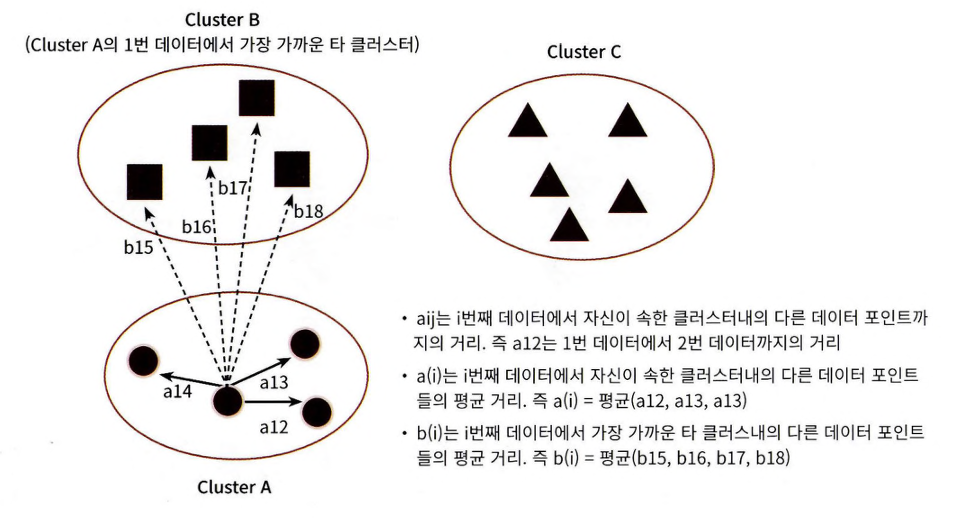

< i번째 데이터 포인트의 실루엣 계수 s(i)>
- 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) - a(i)
> 정규화를 위해 이 값을 MAX(b(i) - a(i))로 나눔

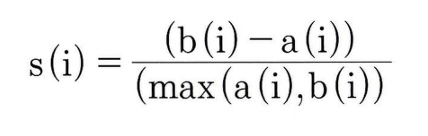


- 실루엣 계수는 -1 ~ 1 사이의 값을 가짐

    - 1에 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 의미

    - '-' 값은 아예 다른 군집에 데이터 포인트가 할당 됐음을 뜻함

< 실루엣 분석을 위한 사이킷런 메서드 >

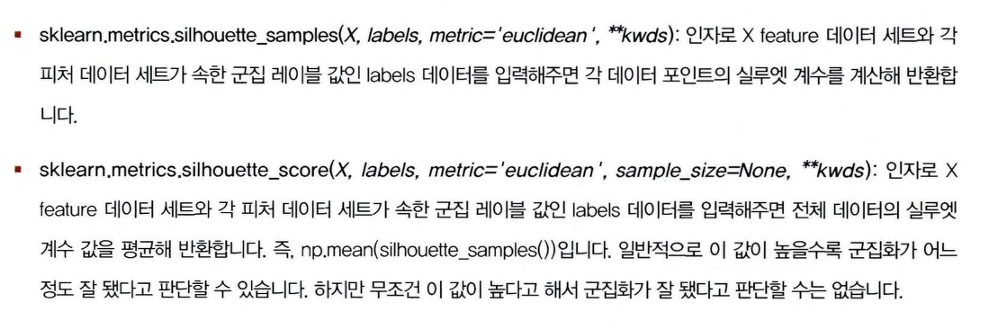

< 좋은 군집화가 되기 위한 조건 >

1.  전체 실루엣 계수의 평균값, 즉 사이킷런의 sihouette_score( )의 값은 0~1 사이의 값을 가지며, 1에 가까울수록 good
2.  전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값 편차가 크지 않아야 함
> 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요
    - 만약, 전체 실루엣 계수 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮다면, 좋은 군집화 조건 X

## 붓꽃 데이터 세트를 이용한 군집 평가

In [19]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
 # 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF ['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score：{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score：0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [20]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


## 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼
수는 없음
- 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음
- 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균의 적절한 군집 개수가 설정됐다고 판단 가능

In [22]:
# X_features에 대해 군집이 2개일 때와 3,4,5개일 때의 군집별 평균 실루엣 계수 값을 알고 싶을 때
# visualize_silhouette([2, 3, 4, 5], X_features)

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def visualize_silhouette(cluster_list, X):
    from matplotlib import pyplot as plt

    for n_clusters in cluster_list:
        fig, ax1 = plt.subplots(1)
        fig.set_size_inches(6, 4)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = kmeans.fit_predict(X)

        silhouette_vals = silhouette_samples(X, cluster_labels)
        silhouette_avg = silhouette_score(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_silhouette_vals = silhouette_vals[cluster_labels == i]
            ith_silhouette_vals.sort()

            size_cluster_i = ith_silhouette_vals.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_silhouette_vals,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        plt.tight_layout()
        plt.show()

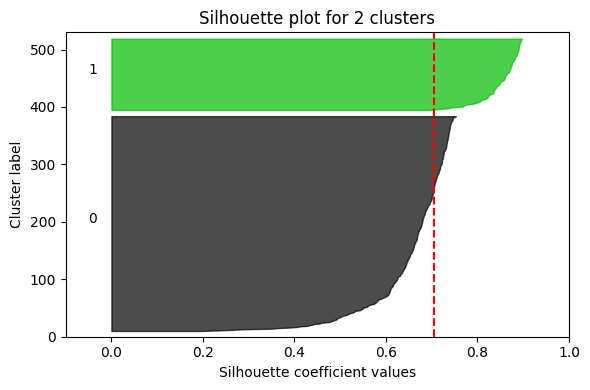

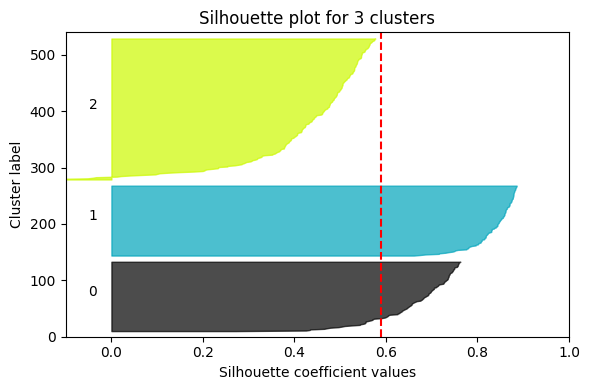

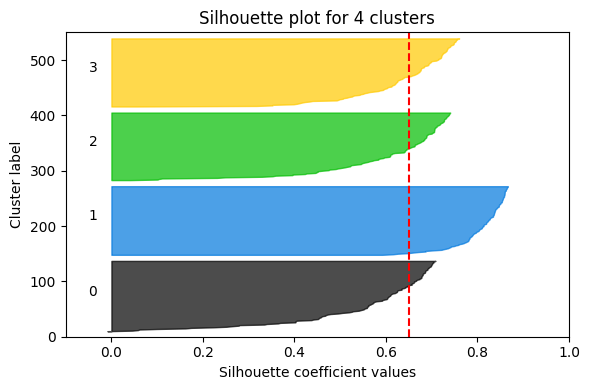

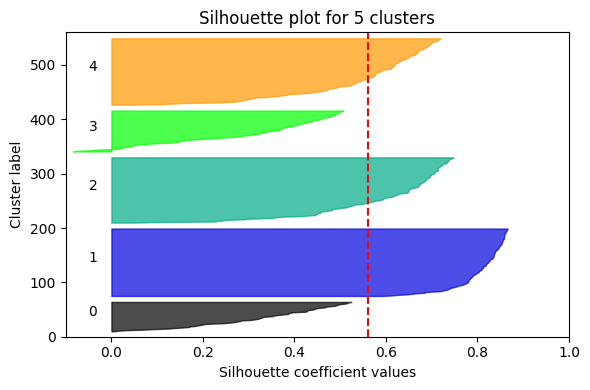

In [24]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y=make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때 군집 별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

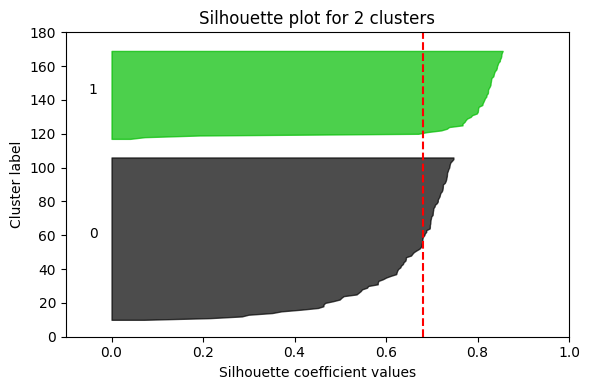

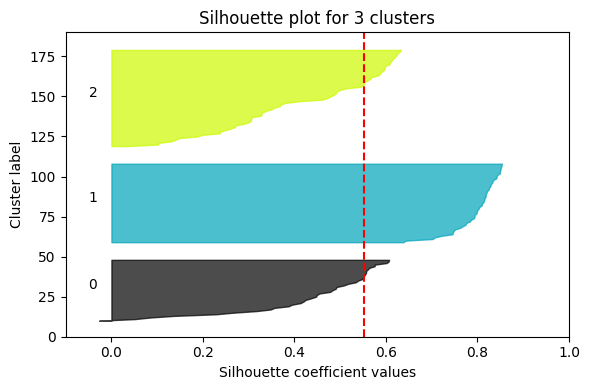

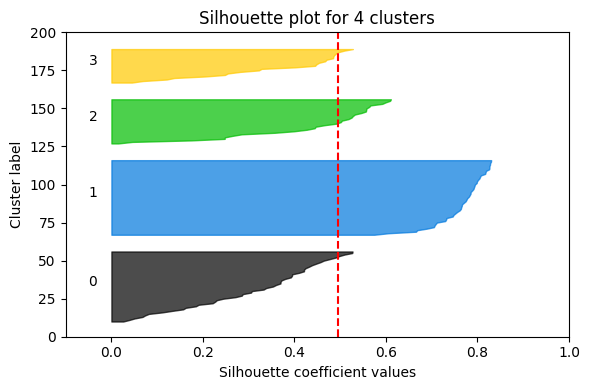

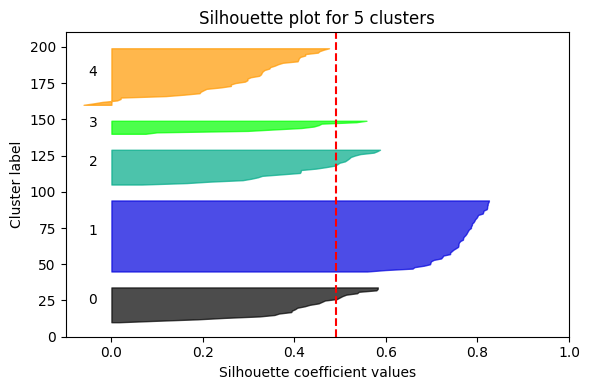

In [25]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)